## ☕ Starbucks Coffee/Tea Classification

Given *data about Starbucks beverages*, let's try to predict whether a given beverage is **tea** or not.

We will use a Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/starbucks/starbucks-menu?select=starbucks_drinkMenu_expanded.csv

### Importing Libraries

In [94]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('starbucks_drinkMenu_expanded.csv')
data

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

### Fill Missing Values

In [36]:
df = data.copy()

In [37]:
df['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [38]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)

In [39]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].astype(float)

In [40]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].fillna(df['Caffeine (mg)'].mean())

In [41]:
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

In [42]:
print("Total missing values: ", df.isna().sum().sum())

Total missing values:  0


### Creating Labels

In [43]:
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0.0


In [44]:
df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [45]:
df['Tea'] = df['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

In [46]:
df = df.drop('Beverage_category', axis=1)

In [47]:
df.head()

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Tea
0,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0,0
1,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0,0
2,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0,0
3,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0,0
4,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0,0


In [48]:
print("Class Distribution: ")
print(df['Tea'].value_counts() / df.shape[0])

Class Distribution: 
Tea
0    0.785124
1    0.214876
Name: count, dtype: float64


### Encoding Features

In [49]:
{column: len(df[column].unique()) for column in ['Beverage', 'Beverage_prep']}

{'Beverage': 33, 'Beverage_prep': 13}

In [50]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [51]:
df = onehot_encode(
    df,
    columns = ['Beverage', 'Beverage_prep'],
    prefixes = ['bev', 'bevp']
)

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
df

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Tea,bev_Banana Chocolate Smoothie,bev_Brewed Coffee,bev_Caffè Americano,bev_Caffè Latte,bev_Caffè Mocha (Without Whipped Cream),bev_Cappuccino,bev_Caramel,bev_Caramel (Without Whipped Cream),bev_Caramel Apple Spice (Without Whipped Cream),bev_Caramel Macchiato,bev_Coffee,bev_Espresso,bev_Hot Chocolate (Without Whipped Cream),bev_Iced Brewed Coffee (With Classic Syrup),bev_Iced Brewed Coffee (With Milk & Classic Syrup),bev_Java Chip,bev_Java Chip (Without Whipped Cream),bev_Mocha,bev_Mocha (Without Whipped Cream),bev_Orange Mango Banana Smoothie,bev_Shaken Iced Tazo® Tea (With Classic Syrup),bev_Shaken Iced Tazo® Tea Lemonade (With Classic Syrup),bev_Skinny Latte (Any Flavour),bev_Strawberries & Crème (Without Whipped Cream),bev_Strawberry Banana Smoothie,bev_Tazo® Chai Tea Latte,bev_Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),bev_Tazo® Full-Leaf Tea Latte,bev_Tazo® Green Tea Latte,bev_Tazo® Tea,bev_Vanilla Bean (Without Whipped Cream),bev_Vanilla Latte (Or Other Flavoured Latte),bev_White Chocolate Mocha (Without Whipped Cream),bevp_2% Milk,bevp_Doppio,bevp_Grande,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
238,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
239,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
240,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Final Cleaning 

In [54]:
df[' Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [55]:
df[' Total Fat (g)'] = df[' Total Fat (g)'].replace('3 2', '3.2')

In [56]:
df.loc[:, 'Calories':'Tea'].dtypes

Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                float64
Tea                            int64
dtype: object

In [62]:
df = df.applymap(lambda x: float(str(x).replace('%', '')))

/tmp/ipykernel_8064/3070032816.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(str(x).replace('%', '')))


### Splitting/Scaling

In [69]:
y = df['Tea'].astype(int).copy()
X = df.drop('Tea', axis=1).copy()

In [70]:
y

0      0
1      0
2      0
3      0
4      0
      ..
237    0
238    0
239    0
240    0
241    0
Name: Tea, Length: 242, dtype: int64

In [71]:
X

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),bev_Banana Chocolate Smoothie,bev_Brewed Coffee,bev_Caffè Americano,bev_Caffè Latte,bev_Caffè Mocha (Without Whipped Cream),bev_Cappuccino,bev_Caramel,bev_Caramel (Without Whipped Cream),bev_Caramel Apple Spice (Without Whipped Cream),bev_Caramel Macchiato,bev_Coffee,bev_Espresso,bev_Hot Chocolate (Without Whipped Cream),bev_Iced Brewed Coffee (With Classic Syrup),bev_Iced Brewed Coffee (With Milk & Classic Syrup),bev_Java Chip,bev_Java Chip (Without Whipped Cream),bev_Mocha,bev_Mocha (Without Whipped Cream),bev_Orange Mango Banana Smoothie,bev_Shaken Iced Tazo® Tea (With Classic Syrup),bev_Shaken Iced Tazo® Tea Lemonade (With Classic Syrup),bev_Skinny Latte (Any Flavour),bev_Strawberries & Crème (Without Whipped Cream),bev_Strawberry Banana Smoothie,bev_Tazo® Chai Tea Latte,bev_Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),bev_Tazo® Full-Leaf Tea Latte,bev_Tazo® Green Tea Latte,bev_Tazo® Tea,bev_Vanilla Bean (Without Whipped Cream),bev_Vanilla Latte (Or Other Flavoured Latte),bev_White Chocolate Mocha (Without Whipped Cream),bevp_2% Milk,bevp_Doppio,bevp_Grande,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,175.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,260.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,330.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,410.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,10.0,0.0,20.0,0.0,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,320.0,3.2,0.4,0.0,0.0,250.0,67.0,1.0,64.0,5.0,6.0,8.0,20.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
238,170.0,0.1,0.1,0.0,0.0,160.0,39.0,0.0,38.0,4.0,6.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
239,200.0,3.5,2.0,0.1,10.0,160.0,39.0,0.0,38.0,3.0,6.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
240,180.0,1.5,0.2,0.0,0.0,160.0,37.0,1.0,35.0,3.0,4.0,0.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [73]:
X

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),bev_Banana Chocolate Smoothie,bev_Brewed Coffee,bev_Caffè Americano,bev_Caffè Latte,bev_Caffè Mocha (Without Whipped Cream),bev_Cappuccino,bev_Caramel,bev_Caramel (Without Whipped Cream),bev_Caramel Apple Spice (Without Whipped Cream),bev_Caramel Macchiato,bev_Coffee,bev_Espresso,bev_Hot Chocolate (Without Whipped Cream),bev_Iced Brewed Coffee (With Classic Syrup),bev_Iced Brewed Coffee (With Milk & Classic Syrup),bev_Java Chip,bev_Java Chip (Without Whipped Cream),bev_Mocha,bev_Mocha (Without Whipped Cream),bev_Orange Mango Banana Smoothie,bev_Shaken Iced Tazo® Tea (With Classic Syrup),bev_Shaken Iced Tazo® Tea Lemonade (With Classic Syrup),bev_Skinny Latte (Any Flavour),bev_Strawberries & Crème (Without Whipped Cream),bev_Strawberry Banana Smoothie,bev_Tazo® Chai Tea Latte,bev_Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),bev_Tazo® Full-Leaf Tea Latte,bev_Tazo® Green Tea Latte,bev_Tazo® Tea,bev_Vanilla Bean (Without Whipped Cream),bev_Vanilla Latte (Or Other Flavoured Latte),bev_White Chocolate Mocha (Without Whipped Cream),bevp_2% Milk,bevp_Doppio,bevp_Grande,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,-1.859434,-0.954624,-0.798492,-0.527920,-0.738892,-1.508338,-1.734360,-0.558428,-1.674141,-1.373732,-1.216473,-0.253528,-1.430252,-0.711557,1.391415,-0.112037,7.713624,-0.129641,-0.228416,-0.228416,-0.228416,-0.112037,-0.196537,-0.129641,-0.228416,-0.228416,-0.091287,-0.228416,-0.112037,-0.196537,-0.112037,-0.196537,-0.112037,-0.196537,-0.112037,-0.112037,-0.112037,-0.129641,-0.196537,-0.112037,-0.228416,-0.228416,-0.228416,-0.228416,-0.129641,-0.129641,-0.228416,-0.228416,-0.51031,-0.064416,-0.172590,-0.346944,7.713624,-0.228416,-0.064416,-0.612372,-0.172590,-0.324072,-0.172590,-0.316228,-0.266076
1,-1.849692,-0.954624,-0.798492,-0.527920,-0.738892,-1.447461,-1.734360,-0.558428,-1.674141,-1.332593,-1.216473,-0.253528,-1.430252,-0.711557,2.775026,-0.112037,7.713624,-0.129641,-0.228416,-0.228416,-0.228416,-0.112037,-0.196537,-0.129641,-0.228416,-0.228416,-0.091287,-0.228416,-0.112037,-0.196537,-0.112037,-0.196537,-0.112037,-0.196537,-0.112037,-0.112037,-0.112037,-0.129641,-0.196537,-0.112037,-0.228416,-0.228416,-0.228416,-0.228416,-0.129641,-0.129641,-0.228416,-0.228416,-0.51031,-0.064416,-0.172590,-0.346944,-0.129641,-0.228416,-0.064416,-0.612372,5.794086,-0.324072,-0.172590,-0.316228,-0.266076
2,-1.839950,-0.954624,-0.798492,-0.527920,-0.738892,-1.447461,-1.734360,-0.558428,-1.674141,-1.229746,-1.216473,-0.253528,-1.430252,-0.711557,3.914471,-0.112037,7.713624,-0.129641,-0.228416,-0.228416,-0.228416,-0.112037,-0.196537,-0.129641,-0.228416,-0.228416,-0.091287,-0.228416,-0.112037,-0.196537,-0.112037,-0.196537,-0.112037,-0.196537,-0.112037,-0.112037,-0.112037,-0.129641,-0.196537,-0.112037,-0.228416,-0.228416,-0.228416,-0.228416,-0.129641,-0.129641,-0.228416,-0.228416,-0.51031,-0.064416,5.794086,-0.346944,-0.129641,-0.228416,-0.064416,-0.612372,-0.172590,-0.324072,-0.172590,-0.316228,-0.266076
3,-1.839950,-0.954624,-0.798492,-0.527920,-0.738892,-1.447461,-1.734360,-0.558428,-1.674141,-1.229746,-1.216473,-0.253528,-1.292438,-0.711557,5.216693,-0.112037,7.713624,-0.129641,-0.228416,-0.228416,-0.228416,-0.112037,-0.196537,-0.129641,-0.228416,-0.228416,-0.091287,-0.228416,-0.112037,-0.196537,-0.112037,-0.196537,-0.112037,-0.196537,-0.112037,-0.112037,-0.112037,-0.129641,-0.196537,-0.112037,-0.228416,-0.228416,-0.228416,-0.228416,-0.129641,-0.129641,-0.228416,-0.228416,-0.51031,-0.064416,-0.172590,-0.346944,-0.129641,-0.228416,-0.064416,-0.612372,-0.172590,-0.324072,5.794086,-0.316228,-0.266076
4,-1.206734,-0.954624,-0.737400,-0.527920,-0.158334,-0.656061,-1.252482,-0.558428,-1.217042,-0.2012

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=64)

### Modeling/Training

In [81]:
X.shape

(242, 61)

In [82]:
inputs = tf.keras.Input(shape=(61,))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [83]:
model = tf.keras.Model(inputs, outputs)

In [84]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
5/5 [==============================] - 1s 87ms/step - loss: 1.0246 - accuracy: 0.2000 - auc: 0.3084 - val_loss: 0.7839 - val_accuracy: 0.2353 - val_auc: 0.2479
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.7109 - accuracy: 0.5556 - auc: 0.5118 - val_loss: 0.6540 - val_accuracy: 0.6471 - val_auc: 0.4604
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.5382 - accuracy: 0.7630 - auc: 0.6911 - val_loss: 0.5873 - val_accuracy: 0.7353 - val_auc: 0.6083
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.4465 - accuracy: 0.8000 - auc: 0.8019 - val_loss: 0.5508 - val_accuracy: 0.7059 - val_auc: 0.6979
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.3948 - accuracy: 0.8148 - auc: 0.8806 - val_loss: 0.5266 - val_accuracy: 0.7059 - val_auc: 0.7812
Epoch 6/100
5/5 [==============================] - 0s 22ms/step - loss: 0.3638 - accuracy: 0.8074 - auc: 0.9137 - val_loss: 0.5054 - val_acc

### Results

In [85]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 13ms/step - loss: 0.0084 - accuracy: 1.0000 - auc: 1.0000


[0.00841513555496931, 1.0, 1.0]

In [90]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array((model.predict(X_test) >= 0.5), dtype=int))

3/3 [==============================] - 0s 4ms/step


In [91]:
y_true

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

In [92]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

In [95]:
cm = confusion_matrix(y_true, y_pred)

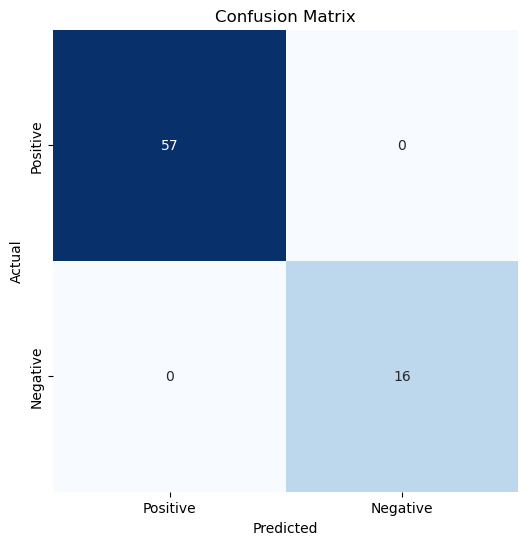

In [96]:
plt.figure(figsize=(6,6))

sns.heatmap(cm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.xticks(np.arange(2) + 0.5, ['Positive', 'Negative'])

plt.ylabel('Actual')
plt.yticks(np.arange(2) + 0.5, ['Positive', 'Negative'])

plt.title("Confusion Matrix")

plt.show()